<h2 align='center' style='color:purple'>Normal Distribution and Z Score: Math and statistics for data science</h2>

In [25]:
import pandas as pd
import seaborn as sn

We are going to use heights dataset from kaggle.com. Dataset has heights and weights 
both but I have removed weights to make it simple


https://www.kaggle.com/mustafaali96/weight-height

In [26]:
df = pd.read_csv(r"E:\Portfolio_Project\statistics\height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**(1) Outlier detection and removal using Standard Deviation**

In [27]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

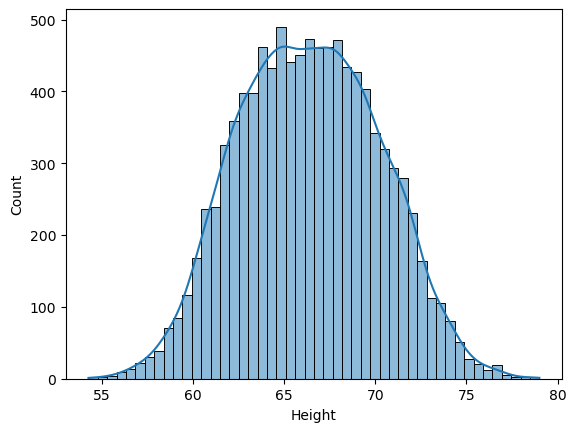

In [28]:
sn.histplot(df.Height, kde=True)

In [29]:
mean = df.Height.mean()
mean

66.36755975482106

In [30]:
std_deviation = df.Height.std()
std_deviation

3.8475281207732324

In [31]:
mean-3*std_deviation

54.82497539250136

In [32]:
mean+3*std_deviation

77.91014411714076

In [33]:
df[(df.Height < 54.82) | (df.Height > 77.91)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [34]:
df_no_outlier = df[(df.Height<77.91) & (df.Height>54.82)]
df_no_outlier.shape

(9993, 3)

**(2) Outlier detection and removal using Z Score**

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

<img height=200 width=300 src="zscore.png" />

Let's add a new column in our dataframe for this Z score

In [35]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [36]:
df.Height.mean()

66.36755975482106

In [37]:
df.Height.std()

3.8475281207732324

In [38]:
(73.84-66.37)/3.84

1.9453124999999998

In [39]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [40]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027
